## 2-1. 훈련 세트와 테스트 세트

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

In [3]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [4]:
fish_target = [1]*35 + [0]*14

In [5]:
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
import numpy as np

In [7]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [8]:
np.random.seed(42)
index = np.arange(49) # 0~48까지의 숫자 생성
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [9]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [10]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

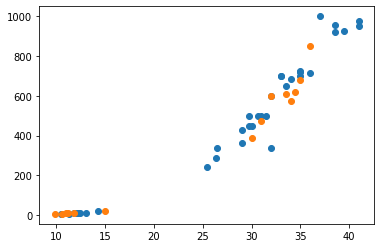

In [11]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [13]:
kn.fit(train_input, train_target) # 훈련

KNeighborsClassifier()

In [14]:
kn.score(test_input, test_target) # 평가

1.0

In [15]:
kn.predict(test_input) # 예측

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [16]:
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


## 2-2. 데이터 전처리

In [17]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [18]:
import numpy as np

In [19]:
fish_data = np.column_stack((fish_length, fish_weight))

In [20]:
print(fish_data[:5,])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [21]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [22]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42) # 샘플링 편향이 생기지 않도록 stratify=fish_target

In [25]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
# 프로그램이 자동으로 36, 13개로 분할

(36, 2) (13, 2)
(36,) (13,)


In [26]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### 수상한 도미 한마리 (길이 25, 무게 150)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [29]:
kn.predict([[25, 150]]) # 도미인데도 빙어로 예측

array([0.])

In [30]:
import matplotlib.pyplot as plt

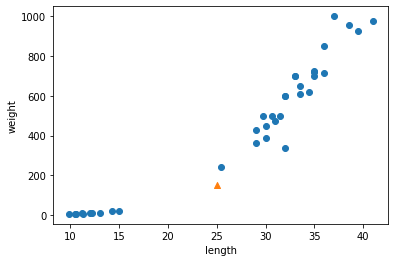

In [31]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# x축은 5단위로 커지지만 y축은 200단위로 커지기 때문에
# 육안으로 보기에는 도미쪽에 가까워 보이지만 실제로 빙어에 더 가깝다.
# 하지만 (25, 150)은 상식적으로 도미로 판단되며
# 이러한 오류는 스케일링을 하지 않아서 발생한다.

In [32]:
distances, indexes = kn.kneighbors([[25, 150]])
# (25, 150) 데이터의 가장 가까운 5개의 샘플까지의 거리와 인덱스를 나타냄

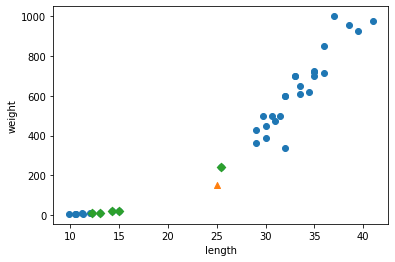

In [33]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 실제로 거리 확인 시 빙어쪽에 4개의 데이터가 선택되었음

In [34]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [35]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [36]:
train_scaled = (train_input - mean) / std

In [37]:
print(train_scaled[:5,]) # 표준화

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]]


In [38]:
new_data = ([25, 150] - mean) / std

In [39]:
print(new_data)

[-0.23012627 -0.94060693]


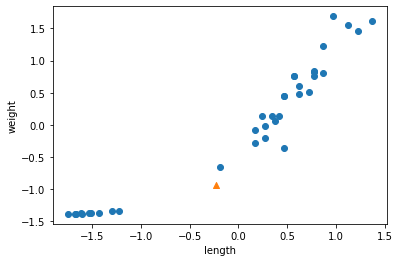

In [40]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new_data[0], new_data[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [41]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [42]:
test_scaled = (test_input - mean) / std

In [43]:
kn.score(test_scaled, test_target)

1.0

In [44]:
kn.predict([[25, 150]]) # 도미로 예측

array([1.])

In [45]:
distances, indexes = kn.kneighbors([new_data])

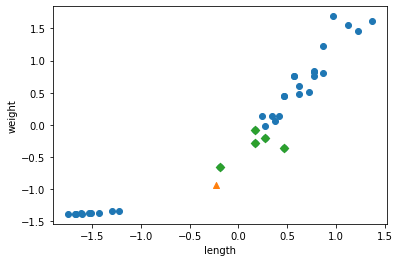

In [46]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new_data[0], new_data[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()